In [1]:
pip install anthropic gdown

   ---------------------------------------- 0.0/239.5 kB ? eta -:--:--
   ---------------------------------------- 239.5/239.5 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 산토리니 이미지 다운로드
!gdown 1_ZN7uCbRHBaZURNukpDHSXkVH2qYvbZn

Downloading...
From: https://drive.google.com/uc?id=1_ZN7uCbRHBaZURNukpDHSXkVH2qYvbZn
To: /content/산토리니.png
100% 741k/741k [00:00<00:00, 6.13MB/s]


In [ ]:
# 다단이 있는 페이지 다운로드
!gdown https://drive.google.com/uc?id=1-_QyNclhy060RUJnoJKAGUD3C0v9jFol

Downloading...
From: https://drive.google.com/uc?id=1-_QyNclhy060RUJnoJKAGUD3C0v9jFol
To: /content/page_105.png
100% 686k/686k [00:00<00:00, 4.30MB/s]


In [ ]:
# 다단이 있는 페이지 다운로드 (xml과 실습)
!gdown 1DeF5_sq85Zgx5acIDS_LSYG4cmhSgHbJ

Downloading...
From: https://drive.google.com/uc?id=1DeF5_sq85Zgx5acIDS_LSYG4cmhSgHbJ
To: /content/page_170.png
100% 690k/690k [00:00<00:00, 36.2MB/s]


In [ ]:
# 다단이 있는 페이지 다운로드 (xml)
!gdown https://drive.google.com/uc?id=1CD-ZQLey8a3kor4I-Pne6EFBfI2xX09a

Downloading...
From (original): https://drive.google.com/uc?id=1CD-ZQLey8a3kor4I-Pne6EFBfI2xX09a
From (redirected): https://drive.google.com/uc?id=1CD-ZQLey8a3kor4I-Pne6EFBfI2xX09a&confirm=t&uuid=185977ff-86c8-4bc8-9e61-a0de6529eff2
To: /content/page_170.xml
100% 4.26k/4.26k [00:00<00:00, 15.4MB/s]


In [ ]:
import os  # 표준 라이브러리
import base64  # 표준 라이브러리

from IPython.display import HTML  # 외부 라이브러리
import anthropic  # 외부 라이브러리

## 1. 클로드 이미지 인식

In [ ]:
os.environ['ANTHROPIC_API_KEY'] =  '여러분들의 Key 값'

In [ ]:
# Anthropic API 클라이언트 초기화
client = anthropic.Anthropic()

In [ ]:
# 이미지를 base64 형식으로 인코딩하는 함수
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
base64_image = encode_image('/content/산토리니.PNG')


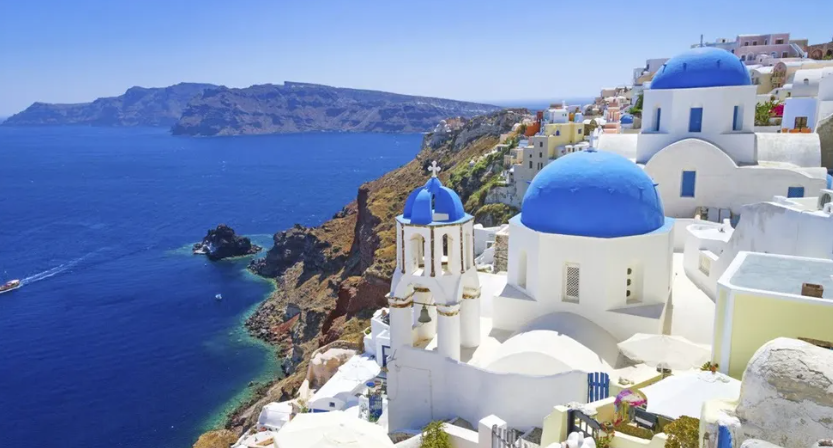

In [ ]:
# HTML로 이미지를 출력하는 코드
image_html = f'<img src="data:image/png;base64,{base64_image}" alt="image" />'
display(HTML(image_html))

In [ ]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=4096,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/png",
                        "data": base64_image,
                    },
                },
                {
                    "type": "text",
                    "text": "이미지에 대해서 설명해줘"
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

이 이미지는 그리스의 산토리니 섬을 보여주고 있습니다. 산토리니는 에게해에 있는 아름다운 섬으로 유명합니다.

이미지에서 볼 수 있는 주요 특징들은 다음과 같습니다:

1. 눈부신 하얀색 건물들이 절벽 위에 자리잡고 있습니다.
2. 파란 돔 지붕을 가진 교회들이 두드러집니다. 이는 그리스 정교회 건축의 전형적인 모습입니다.
3. 푸른 에게해가 배경으로 펼쳐져 있으며, 멀리 다른 섬의 윤곽이 보입니다.
4. 해안선은 가파른 절벽으로 이루어져 있어 극적인 풍경을 만들어냅니다.
5. 하얀 건물들과 파란 지붕, 그리고 푸른 바다가 어우러져 그리스의 전형적인 색채 대비를 보여줍니다.

이 장면은 산토리니의 오이아(Oia) 마을로 보이며, 이곳은 아름다운 일몰 풍경으로 유명한 관광지입니다. 전체적으로 이 이미지는 그리스의 아름다운 섬 풍경과 전통적인 건축, 그리고 푸른 지중해의 매력을 잘 보여주고 있습니다.


## 2. 다단 있는 PDF 인식

In [ ]:
base64_image = encode_image('/content/page_105.png')


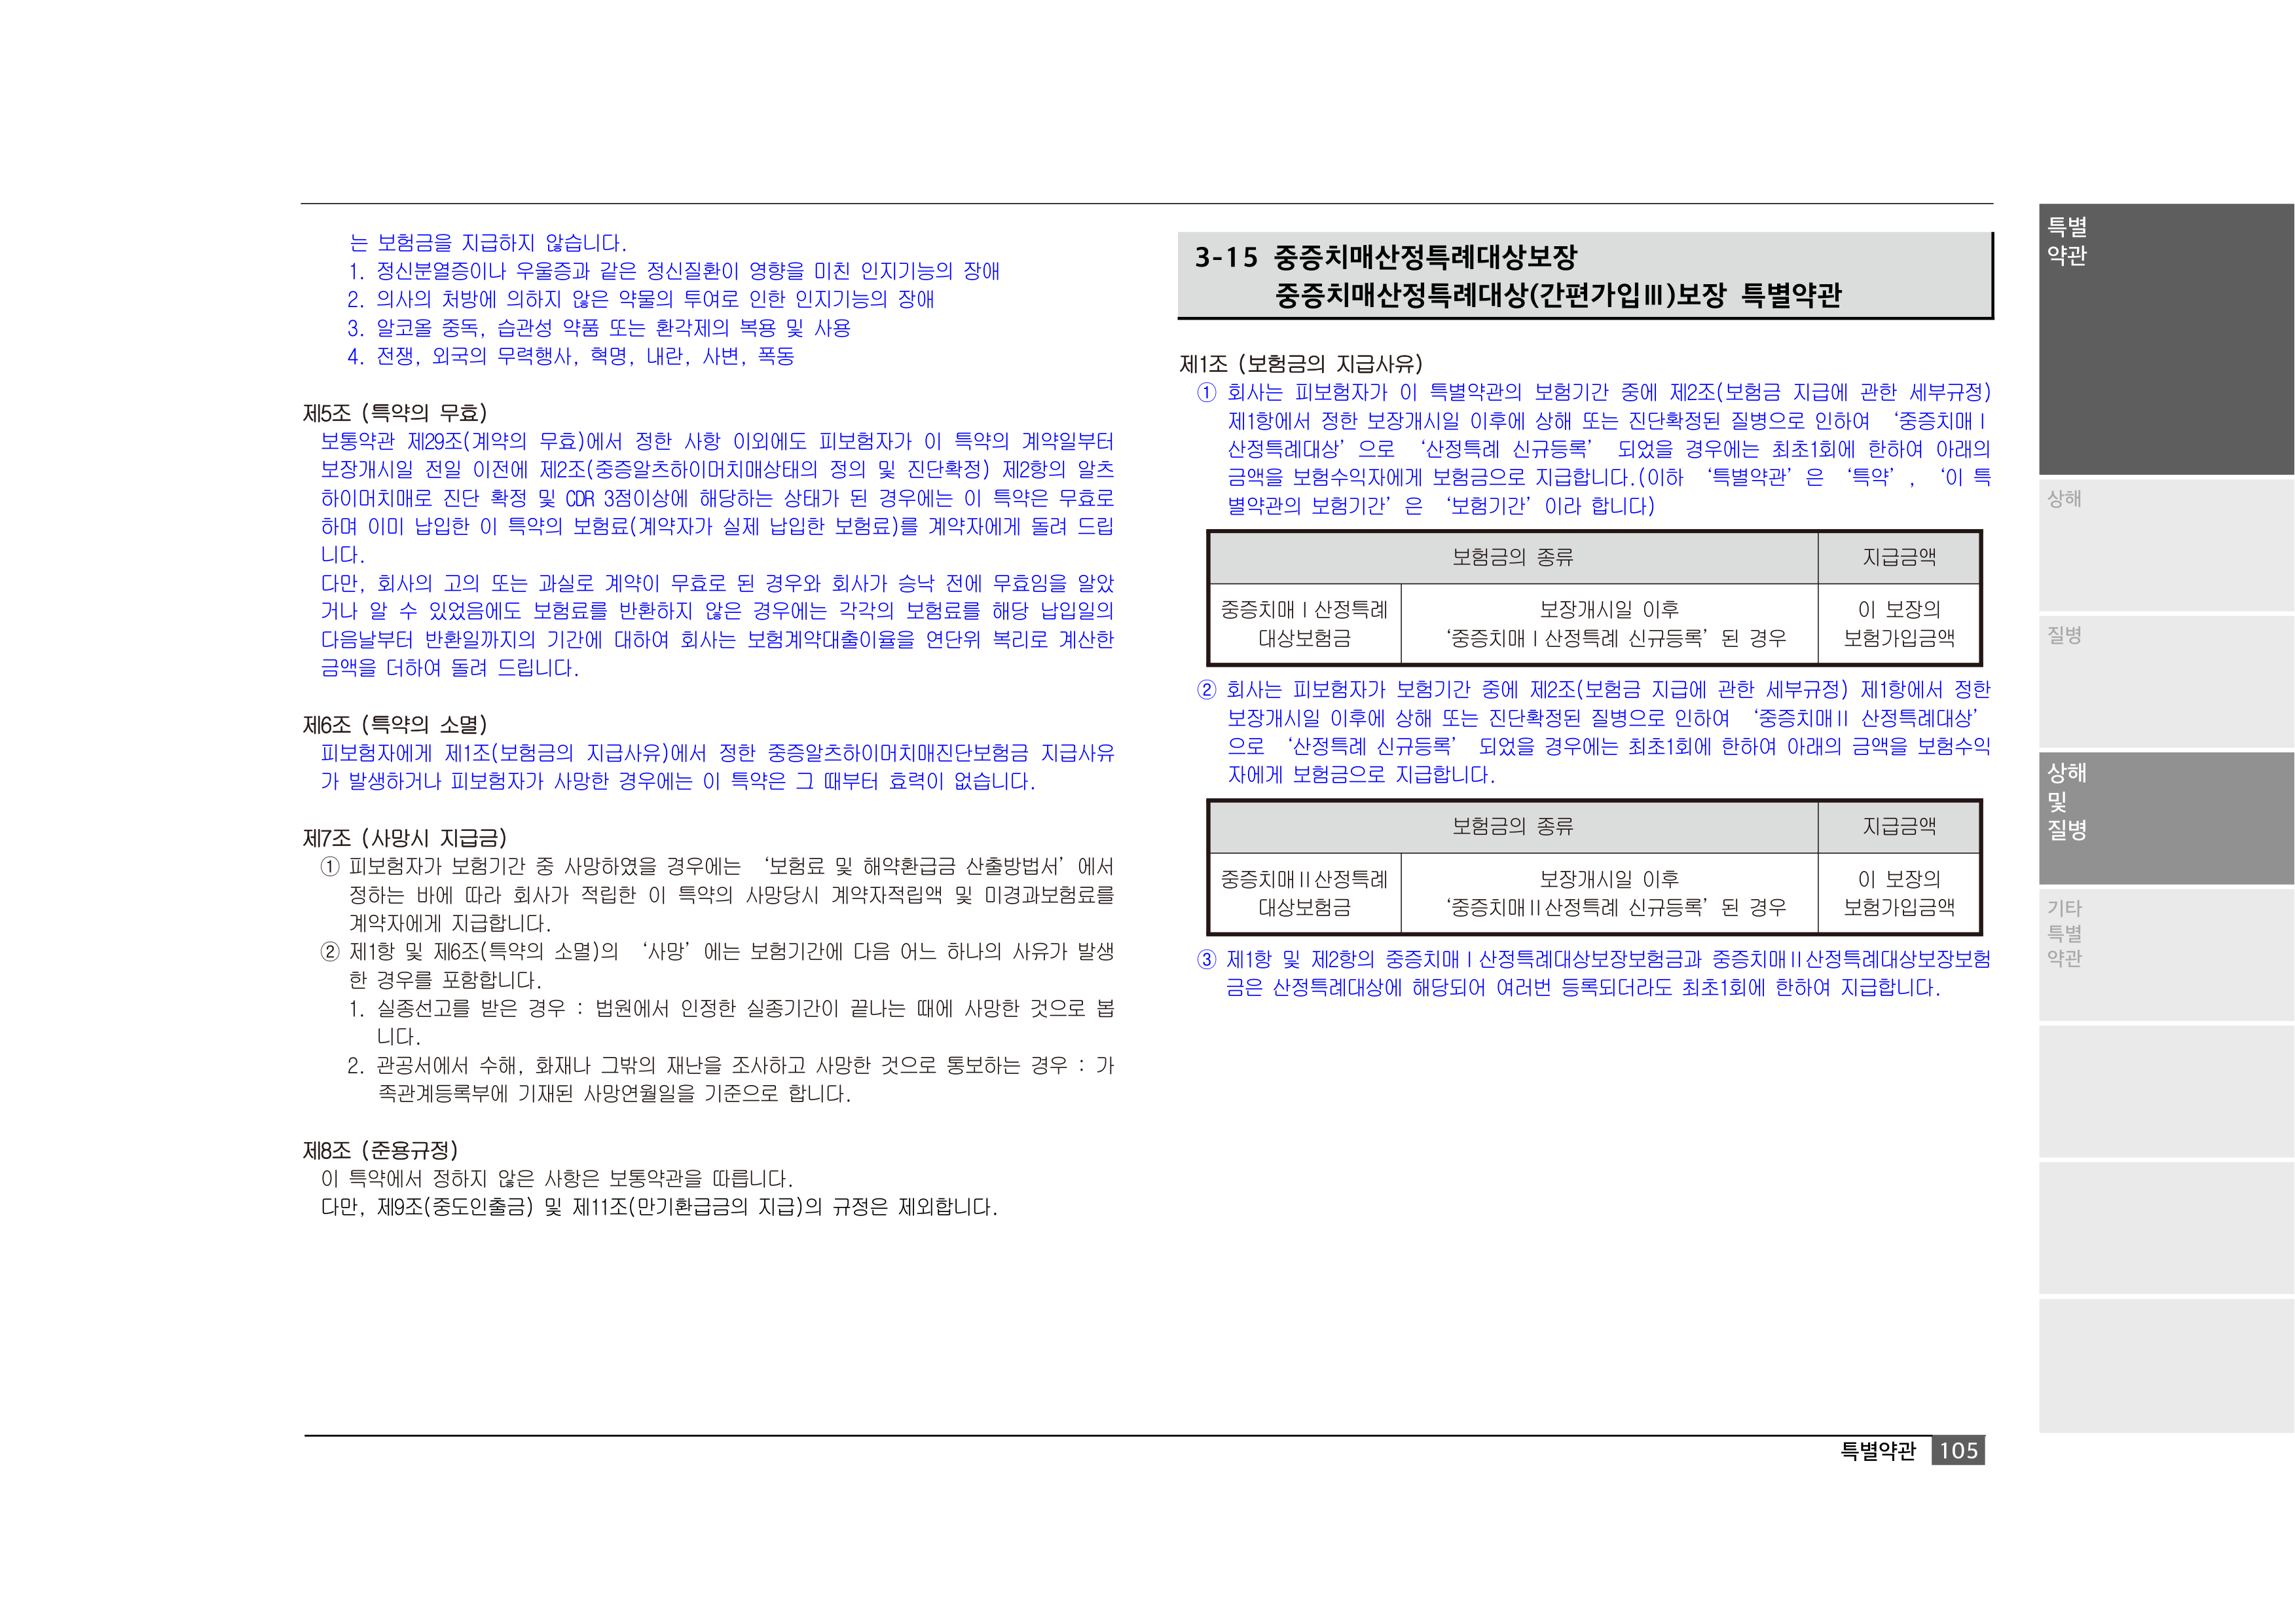

In [ ]:
# HTML로 이미지를 출력하는 코드 (너비 300px로 조정)
image_html = f'<img src="data:image/png;base64,{base64_image}" alt="image" width="1100px" />'
display(HTML(image_html))

In [ ]:
system_prompt = '''당신이 해석할 이미지는 보험 약관입니다.
1. 중요한 내용이므로 요약하지말고 문법에 신경쓰면서 보이는 그대로 작성해주세요.
2. 내용을 임의로 바꾸지 마세요. 그리고 보이는 모든 내용을 다 적으십시오.
3. 단, 테이블은 풀어서 평문 또는 나열식으로 작성해주세요. 이미지에 없는 말은 적지마세요.
4. 테이블 풀어서 평문 또는 나열식으로 작성할 때 다른 행과 열이랑 헷갈리지 않게 값마다 잘 구분해서 적어주세요.
5. 테이블 해석할 때 통합셀들이 존재하니 구조를 잘 해석해서 작성해주시기 바랍니다. 어떤 게 어떤 것의 하위 내용인지를 명확히 하십시오
6. 당신의 의견은 궁금하지 않습니다. 해드렸습니다. 완성했습니다. 이런 표현도 적지마십시오. 이미지에 있는 내용만 적으십시오.
7. 만약 다단으로 구성되어져 있다면 좌측 테이블부터 먼저 작성하고 우측 테이블을 작성하십시오.

자, 당신이 모든 내용을 빠트리지 않으면서 테이블은 구조를 잘 해석해서 작성해주는 것을 믿습니다.
'''

In [ ]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=4096,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/png",
                        "data": base64_image,
                    },
                },
                {
                    "type": "text",
                    "text": system_prompt
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

노 보험금을 지급하지 않습니다.
1. 전신마비등으로 인해 무릎중과 같은 정신질환이 영월을 이천 인지기능의 장애
2. 의식의 지명이 되어서 걸은 복울의 무여로 인한 인지기능의 장애
3. 일고를 동력, 음곷성 역물 또는 환정제의 복용 및 사용
4. 전쟁, 외국의 무력행사, 혁명, 내란, 사변, 폭동

제5조 (특약의 무효)
보험약관 제23조(계약의 무효)에서 정한 사항 이외에도 피보험자가 이 특약의 계약일로부터 보험개시일 전일 이전에 제2조(중증치매상태의치매상태의 정의 및 진단확정) 제2항에서 정한 "중증치매상태"로 진단 확정된 경우에는 이 특약은 무효로 하며 이미 납입한 이 특약의 보험료를 계약자에게 돌려 드립니다.

제6조 (특약의 소멸)
피보험자에게 제1조(보험금의 지급사유)에서 정한 중증치매상태진단급여금 지급사유가 발생하거나 피보험자가 사망한 경우에는 이 특약은 그 때부터 효력이 없습니다.

제7조 (사망시 지급금)
① 피보험자가 보험기간 중 사망하였을 경우에는 "보험료 및 해약환급금 산출방법서"에서 정하는 바에 따라 회사가 적립한 이 특약의 사망당시 책임준비금을 계약자에게 지급합니다.
② 제1항 및 제6조(특약의 소멸)의 '사망'에는 보험기간에 다음 어느 하나의 사유가 발생한 경우를 포합합니다.
1. 실종선고를 받은 경우 : 법원에서 인정한 실종기간이 끝나는 때에 사망한 것으로 봅니다.
2. 관공서에서 수해, 화재나 그밖의 재난을 조사하고 사망한 것으로 통보하는 경우 : 가족관계등록부에 기재된 사망연월일을 기준으로 합니다.

제8조 (준용규정)
이 특약에서 정하지 않은 사항은 보통약관을 따릅니다.
다만, 제5조(중도인출금) 및 제11조(만기환급금의 지급)의 규정은 제외합니다.

3-15 중증치매상정특별대상보장
중증치매상정특별대상(간편가입III)보장 특별약관

제1조 (보험금의 지급사유)
① 회사는 피보험자가 이 특별약관의 보험기간 중에 제2조(보험금 지급에 관한 세부규정) 제1항에서 정한 보장개시일(책임개시일) 이후에 발생한 "중증치배(법정)상태"가 90

## 3. XML도 함께 입력으로 사용

In [ ]:
base64_image = encode_image('/content/page_170.png')


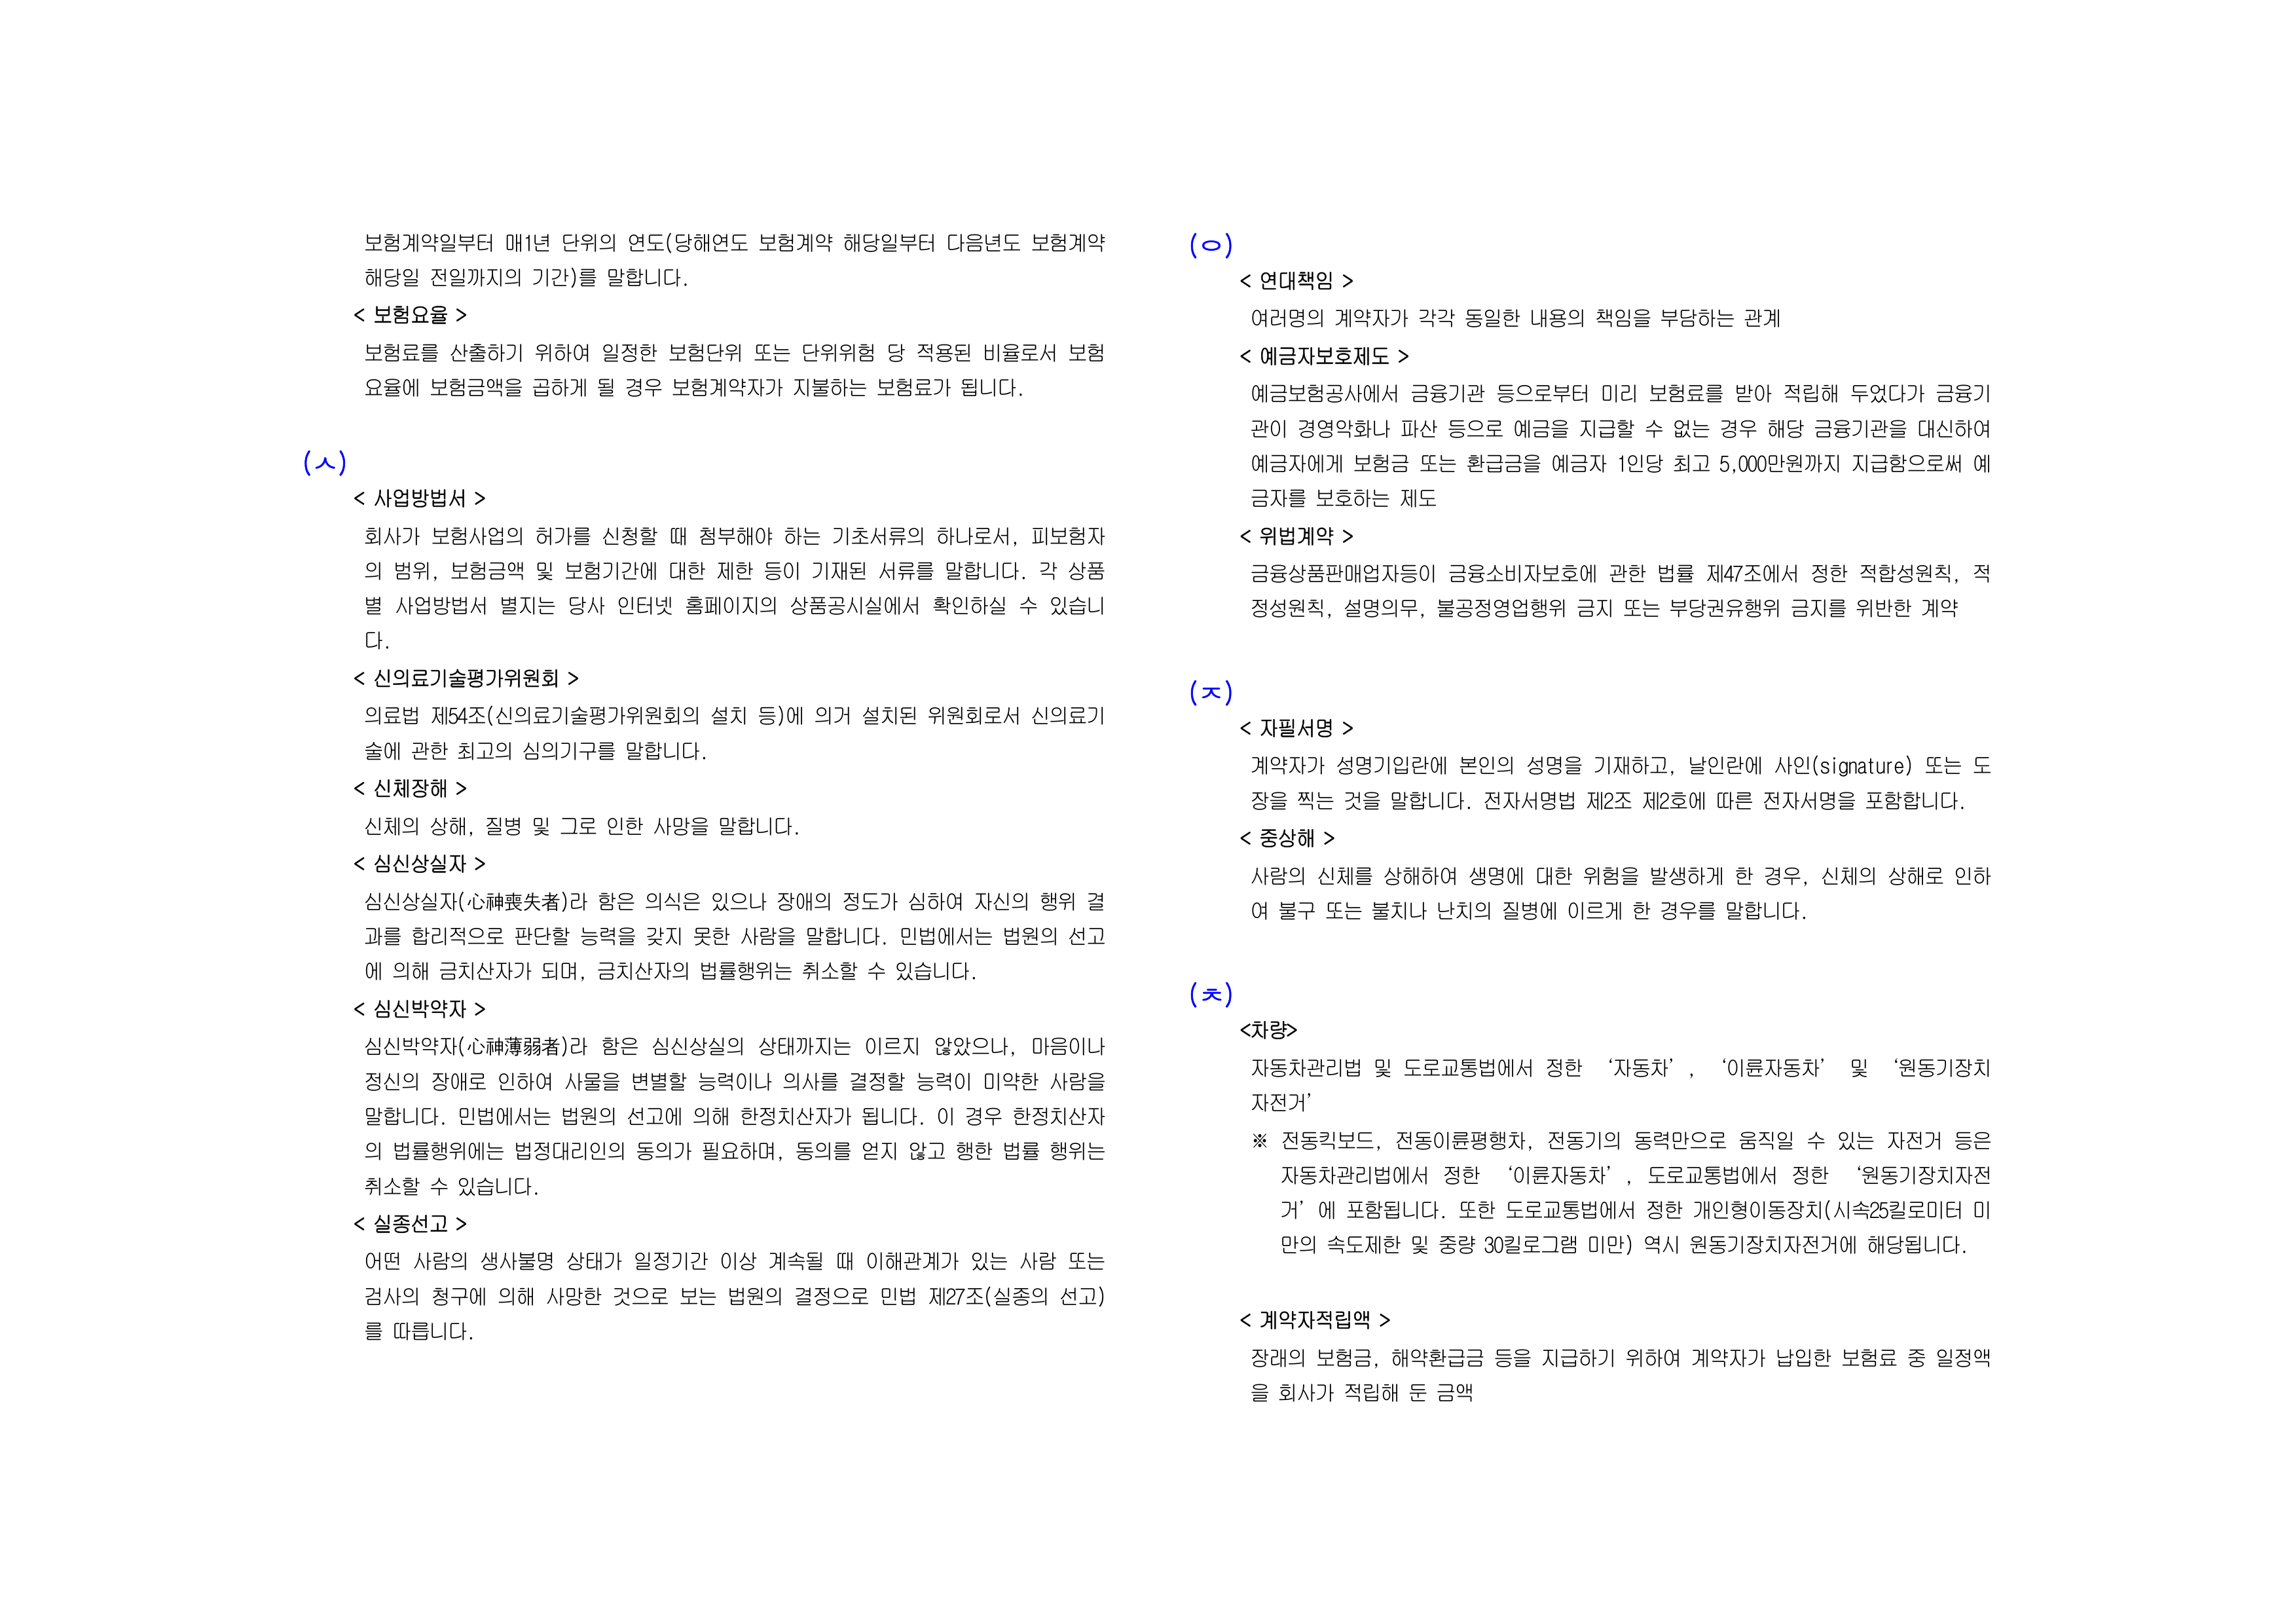

In [ ]:
# HTML로 이미지를 출력하는 코드 (너비 300px로 조정)
image_html = f'<img src="data:image/png;base64,{base64_image}" alt="image" width="1100px" />'
display(HTML(image_html))

In [ ]:
# XML이 있는 경우 사용할 시스템 프롬프트
system_prompt = '''당신이 해석할 이미지는 보험 약관입니다.
1. 중요한 내용이므로 요약하지말고 문법에 신경쓰면서 보이는 그대로 작성해주세요.
2. 내용을 임의로 바꾸지 마세요. 그리고 보이는 모든 내용을 다 적으십시오.
3. 단, 테이블은 풀어서 평문 또는 나열식으로 작성해주세요. 이미지에 없는 말은 적지마세요.
4. 테이블 풀어서 평문 또는 나열식으로 작성할 때 다른 행과 열이랑 헷갈리지 않게 값마다 잘 구분해서 적어주세요.
5. 테이블 해석할 때 통합셀들이 존재하니 구조를 잘 해석해서 작성해주시기 바랍니다. 어떤 게 어떤 것의 하위 내용인지를 명확히 하십시오
6. 당신의 의견은 궁금하지 않습니다. 해드렸습니다. 완성했습니다. 이런 표현도 적지마십시오. 이미지에 있는 내용만 적으십시오.
7. 만약 다단으로 구성되어져 있다면 좌측 테이블부터 먼저 작성하고 우측 테이블을 작성하십시오.
8. 당신에게 당신이 해석할 파일을 xml로 변경한 내용도 드리겠습니다. 페이지 해석할 때 참고하세요.
9. xml에 있는 텍스트는 반드시 해당 페이지에 존재한다는 겁니다. xml에 있는 텍스트를 빠트리지 마십시오.

자 당신이 헷갈리지 않도록 xml도 드렸습니다. 이미지를 더 잘 해석할 거라 믿습니다.
'''

In [ ]:
with open('/content/page_170.xml', 'r', encoding='utf-8') as f:
    xml_content = f.read()

In [ ]:
xml_content

'<?xml version="1.0" ?>\n<page>\n  <text> 보험계약일부터 매1년 단위의 연도(당해연도 보험계약 해당일부터 다음년도 보험계약 \n해당일 전일까지의 기간)를 말합니다.\n&lt; 보험요율 &gt; \n 보험료를 산출하기 위하여 일정한 보험단위 또는 단위위험 당 적용된 비율로서 보험\n요율에 보험금액을 곱하게 될 경우 보험계약자가 지불하는 보험료가 됩니다.\n(ㅅ)\n&lt; 사업방법서 &gt;\n 회사가 보험사업의 허가를 신청할 때 첨부해야 하는 기초서류의 하나로서, 피보험자\n의 범위, 보험금액 및 보험기간에 대한 제한 등이 기재된 서류를 말합니다. 각 상품\n별 사업방법서 별지는 당사 인터넷 홈페이지의 상품공시실에서 확인하실 수 있습니\n다.\n&lt; 신의료기술평가위원회 &gt;\n 의료법 제54조(신의료기술평가위원회의 설치 등)에 의거 설치된 위원회로서 신의료기\n술에 관한 최고의 심의기구를 말합니다.\n&lt; 신체장해 &gt;\n 신체의 상해, 질병 및 그로 인한 사망을 말합니다.\n&lt; 심신상실자 &gt;\n 심신상실자(心神喪失者)라 함은 의식은 있으나 장애의 정도가 심하여 자신의 행위 결\n과를 합리적으로 판단할 능력을 갖지 못한 사람을 말합니다. 민법에서는 법원의 선고\n에 의해 금치산자가 되며, 금치산자의 법률행위는 취소할 수 있습니다.\n&lt; 심신박약자 &gt;\n 심신박약자(心神薄弱者)라 함은 심신상실의 상태까지는 이르지 않았으나, 마음이나 \n정신의 장애로 인하여 사물을 변별할 능력이나 의사를 결정할 능력이 미약한 사람을 \n말합니다. 민법에서는 법원의 선고에 의해 한정치산자가 됩니다. 이 경우 한정치산자\n의 법률행위에는 법정대리인의 동의가 필요하며, 동의를 얻지 않고 행한 법률 행위는 \n취소할 수 있습니다.\n&lt; 실종선고 &gt;\n 어떤 사람의 생사불명 상태가 일정기간 이상 계속될 때 이해관계가 있는 사람 또는 \n검사의 청구에 의해 사망한 것으로 보는 법원의 결정으로 민법 제27조(실종의

In [ ]:
prompt = system_prompt + xml_content + '\n시작!'

In [ ]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=4096,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/png",
                        "data": base64_image,
                    },
                },
                {
                    "type": "text",
                    "text": prompt
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

보험계약일부터 매1년 단위의 연도(당해연도 보험계약 해당일부터 다음년도 보험계약 해당일 전일까지의 기간)를 말합니다.

<보험요율>
보험료를 산출하기 위하여 일정한 보험단위 또는 단위위험 당 적용된 비율로서 보험요율에 보험금액을 곱하게 될 경우 보험계약자가 지불하는 보험료가 됩니다.

(ㅅ)
<사업방법서>
회사가 보험사업의 허가를 신청할 때 첨부해야 하는 기초서류의 하나로서, 피보험자의 범위, 보험금액 및 보험기간에 대한 제한 등이 기재된 서류를 말합니다. 각 상품별 사업방법서 별지는 당사 인터넷 홈페이지의 상품공시실에서 확인하실 수 있습니다.

<신의료기술평가위원회>
의료법 제54조(신의료기술평가위원회의 설치 등)에 의거 설치된 위원회로서 신의료기술에 관한 최고의 심의기구를 말합니다.

<신체장해>
신체의 상해, 질병 및 그로 인한 사망을 말합니다.

<심신상실자>
심신상실자(心神喪失者)라 함은 의식은 있으나 장애의 정도가 심하여 자신의 행위 결과를 합리적으로 판단할 능력을 갖지 못한 사람을 말합니다. 민법에서는 법원의 선고에 의해 금치산자가 되며, 금치산자의 법률행위는 취소할 수 있습니다.

<심신박약자>
심신박약자(心神薄弱者)라 함은 심신상실의 상태까지는 이르지 않았으나, 마음이나 정신의 장애로 인하여 사물을 변별할 능력이나 의사를 결정할 능력이 미약한 사람을 말합니다. 민법에서는 법원의 선고에 의해 한정치산자가 됩니다. 이 경우 한정치산자의 법률행위에는 법정대리인의 동의가 필요하며, 동의를 얻지 않고 행한 법률 행위는 취소할 수 있습니다.

<실종선고>
어떤 사람의 생사불명 상태가 일정기간 이상 계속될 때 이해관계가 있는 사람 또는 검사의 청구에 의해 사망한 것으로 보는 법원의 결정으로 민법 제27조(실종의 선고)를 따릅니다.

(ㅇ)
<연대책임>
여러명의 계약자가 각각 동일한 내용의 책임을 부담하는 관계

<예금자보호제도>
예금보험공사에서 금융기관 등으로부터 미리 보험료를 받아 적립해 두었다가 금융기관이 경영악화나 파산 등으로 예금을 지급할 수 없는 